In [254]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [255]:
stockdata = {}

for symbol in ['AAPL','TSLA','GOOG','AMZN','MSFT']:
    print(">>", symbol, "......")
    data = yf.download(symbol,"2018-01-01","2022-08-31")
    #print(data)
    stockdata.update({symbol:data})

stockdata



>> AAPL ......
[*********************100%***********************]  1 of 1 completed
>> TSLA ......
[*********************100%***********************]  1 of 1 completed
>> GOOG ......
[*********************100%***********************]  1 of 1 completed
>> AMZN ......
[*********************100%***********************]  1 of 1 completed
>> MSFT ......
[*********************100%***********************]  1 of 1 completed


{'AAPL':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2018-01-02   42.540001   43.075001   42.314999   43.064999   41.018421   
 2018-01-03   43.132500   43.637501   42.990002   43.057499   41.011292   
 2018-01-04   43.134998   43.367500   43.020000   43.257500   41.201786   
 2018-01-05   43.360001   43.842499   43.262501   43.750000   41.670872   
 2018-01-08   43.587502   43.902500   43.482498   43.587502   41.516098   
 ...                ...         ...         ...         ...         ...   
 2022-08-24  167.320007  168.110001  166.250000  167.529999  167.529999   
 2022-08-25  168.779999  170.139999  168.350006  170.029999  170.029999   
 2022-08-26  170.570007  171.050003  163.559998  163.619995  163.619995   
 2022-08-29  161.149994  162.899994  159.820007  161.380005  161.380005   
 2022-08-30  162.130005  162.559998  157.720001  158.910004  158.910004   
 
               

In [256]:
ap = stockdata['AAPL']
ap

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.018421,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.011292,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.201786,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.670872,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.516098,82271200
...,...,...,...,...,...,...
2022-08-24,167.320007,168.110001,166.250000,167.529999,167.529999,53841500
2022-08-25,168.779999,170.139999,168.350006,170.029999,170.029999,51218200
2022-08-26,170.570007,171.050003,163.559998,163.619995,163.619995,78961000


In [257]:
aps = ap.drop(columns="Volume")

aps = ap.drop(columns="Volume")

aps.plot()
plt.title('apple prices')
plt.ylabel('Price')
plt.show()


aps = ap.drop(columns="Volume")
sns.lineplot(data=aps)
#plt.style.use("fivethirtyeight")

In [258]:
px.line(aps,title='apple prices')

In [259]:
px.line(ap['Volume'],title='apple volume')

In [260]:
ap['Adj Close']

Date
2018-01-02     41.018421
2018-01-03     41.011292
2018-01-04     41.201786
2018-01-05     41.670872
2018-01-08     41.516098
                 ...    
2022-08-24    167.529999
2022-08-25    170.029999
2022-08-26    163.619995
2022-08-29    161.380005
2022-08-30    158.910004
Name: Adj Close, Length: 1174, dtype: float64

In [261]:
ap['Adj Close'].pct_change()[1:]

Date
2018-01-03   -0.000174
2018-01-04    0.004645
2018-01-05    0.011385
2018-01-08   -0.003714
2018-01-09   -0.000115
                ...   
2022-08-24    0.001794
2022-08-25    0.014923
2022-08-26   -0.037699
2022-08-29   -0.013690
2022-08-30   -0.015305
Name: Adj Close, Length: 1173, dtype: float64

In [262]:
dailyreturns = ap['Adj Close'].pct_change()[1:]

In [263]:
dailyreturns

Date
2018-01-03   -0.000174
2018-01-04    0.004645
2018-01-05    0.011385
2018-01-08   -0.003714
2018-01-09   -0.000115
                ...   
2022-08-24    0.001794
2022-08-25    0.014923
2022-08-26   -0.037699
2022-08-29   -0.013690
2022-08-30   -0.015305
Name: Adj Close, Length: 1173, dtype: float64

In [264]:
px.line(dailyreturns)

Excess daily returns = Strategy returns - financing cost, assuming risk free rate of 4%

In [265]:
excessRet = dailyreturns-0.04/252

In [266]:
excessRet

Date
2018-01-03   -0.000333
2018-01-04    0.004486
2018-01-05    0.011226
2018-01-08   -0.003873
2018-01-09   -0.000274
                ...   
2022-08-24    0.001635
2022-08-25    0.014764
2022-08-26   -0.037858
2022-08-29   -0.013849
2022-08-30   -0.015464
Name: Adj Close, Length: 1173, dtype: float64

In [267]:
sharpeRatio = np.sqrt(252) * np.mean(excessRet)/np.std(excessRet)

In [268]:
sharpeRatio

0.9261880390836273

def calculateMaxDD(cumret):
    #calculation of max drawdown and max drawdown duration based on cumulutative COMPUNDED returns.
    #cumret must be a compunded cumulative return 
    #i is the index of the day with maxDD

    highwatermark = np.zeros(cumret.shape)
    drawdown = np.zeros(cumret.shape)
    drawdownduration = np.zeros(cumret.shape)
    for t in np.arange(1,cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1],cumret[t])
        drawdown[t] = (1+cumret[t])/(1+highwatermark[t])-1
        if drawdown[t]==0:
            drawdownduration[t] = 0
        else:
            drawdownduration[t] = drawdownduration[t-1]+1
    
    maxDD, i = np.min(drawdown), np.argmin(drawdown) #drawdown < 0 always
    maxDDD = np.max(drawdownduration)
    return maxDD, maxDDD, i 

In [269]:
from calculateMaxDD import calculateMaxDD

In [270]:
spy = yf.download('SPY',"2018-01-01","2022-08-31")
spy

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,248.918091,86655700
2018-01-03,268.959991,270.640015,268.959991,270.470001,250.492569,90070400
2018-01-04,271.200012,272.160004,270.540009,271.609985,251.548340,80636400
2018-01-05,272.510010,273.559998,271.950012,273.420013,253.224686,83524000
2018-01-08,273.309998,274.100006,272.980011,273.920013,253.687790,57319200
...,...,...,...,...,...,...
2022-08-24,412.109985,415.109985,411.390015,413.670013,413.670013,49177800
2022-08-25,415.239990,419.559998,414.089996,419.510010,419.510010,50942300
2022-08-26,419.390015,419.959991,405.250000,405.309998,405.309998,103087000


In [271]:
df = pd.merge(ap,spy,on="Date", suffixes = ("_AAPL","_SPY"))
df

,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,Open_SPY,High_SPY,Low_SPY,Close_SPY,Adj Close_SPY,Volume_SPY
Date,,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.018421,102223600,267.839996,268.809998,267.399994,268.769989,248.918091,86655700
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.011292,118071600,268.959991,270.640015,268.959991,270.470001,250.492569,90070400
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.201786,89738400,271.200012,272.160004,270.540009,271.609985,251.548340,80636400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.670872,94640000,272.510010,273.559998,271.950012,273.420013,253.224686,83524000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.516098,82271200,273.309998,274.100006,272.980011,273.920013,253.687790,57319200
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,167.320007,168.110001,166.250000,167.529999,167.529999,53841500,412.109985,415.109985,411.390015,413.670013,413.670013,49177800
2022-08-25,168.779999,170.139999,168.350006,170.029999,170.029999,51218200,415.239990,419.559998,414.089996,419.510010,419.510010,50942300
2022-08-26,170.570007,171.050003,163.559998,163.619995,163.619995,78961000,419.390015,419.959991,405.250000,405.309998,405.309998,103087000


In [272]:
dailyret = df[['Adj Close_AAPL','Adj Close_SPY']].pct_change()[1:]
dailyret 

,Adj Close_AAPL,Adj Close_SPY
Date,,
2018-01-03,-0.000174,0.006325
2018-01-04,0.004645,0.004215
2018-01-05,0.011385,0.006664
2018-01-08,-0.003714,0.001829
2018-01-09,-0.000115,0.002263
...,...,...
2022-08-24,0.001794,0.003201
2022-08-25,0.014923,0.014118
2022-08-26,-0.037699,-0.033849


In [273]:
netRet = (dailyret['Adj Close_AAPL'] - dailyret['Adj Close_SPY'])/2

In [274]:
sharpeRatio = np.sqrt(252) * np.mean(netRet) / np.std(netRet)
sharpeRatio

1.0781630077635662

In [275]:
cumRet = np.cumprod(1+netRet) - 1 
cumRet

Date
2018-01-03   -0.003250
2018-01-04   -0.003035
2018-01-05   -0.000682
2018-01-08   -0.003451
2018-01-09   -0.004636
                ...   
2022-08-24    0.647035
2022-08-25    0.647698
2022-08-26    0.644526
2022-08-29    0.638706
2022-08-30    0.635160
Length: 1173, dtype: float64

In [276]:
px.line(cumRet, title = "Cumulative Returns", labels={"value": "Returns"},template="plotly_dark")

In [277]:
maxDD, maxDDD, startDDday = calculateMaxDD(cumRet.values)
print(maxDD, maxDDD, startDDday)

-0.15242120118623026 245.0 265


In [278]:
import statsmodels.api as sm

Pair trading GLD and GDX, GOLD and a basket of gold mining stocks 

In [279]:
df1 = pd.read_excel("misc files/GLD.xls")
df2 = pd.read_excel("misc files/GDX.xls")

In [280]:
df1

,Date,Open,High,Low,Close,Volume,Adj Close
0,2007-11-30,78.35,78.60,76.98,77.32,9509100,77.32
1,2007-11-29,79.28,79.33,78.28,78.28,9306700,78.28
2,2007-11-28,79.42,79.87,78.76,79.57,9706700,79.57
3,2007-11-27,80.70,80.89,79.81,80.10,7229900,80.10
4,2007-11-26,82.25,82.25,81.13,81.30,7440200,81.30
...,...,...,...,...,...,...,...
759,2004-11-24,44.93,45.05,44.79,45.05,6105100,45.05
760,2004-11-23,44.88,44.92,44.72,44.75,3169200,44.75
761,2004-11-22,44.75,44.97,44.74,44.95,11996000,44.95
762,2004-11-19,44.49,44.92,44.47,44.78,11655300,44.78


In [281]:
df2

,Date,Open,High,Low,Close,Volume,Adj Close
0,2007-11-30,47.09,47.50,45.70,46.36,2006000,46.36
1,2007-11-29,47.10,48.00,46.76,47.02,1668500,47.02
2,2007-11-28,46.11,48.00,46.06,47.86,3893200,47.86
3,2007-11-27,46.84,46.84,45.74,46.61,2329700,46.61
4,2007-11-26,49.43,49.43,46.85,47.06,1966500,47.06
...,...,...,...,...,...,...,...
380,2006-05-30,39.50,39.72,38.11,38.17,559100,38.06
381,2006-05-26,38.74,38.74,37.77,38.55,269400,38.44
382,2006-05-25,37.18,38.32,36.98,38.32,367000,38.21
383,2006-05-24,37.13,37.57,35.87,36.52,638600,36.41


In [282]:
df = pd.merge(df1,df2, on="Date", suffixes= ("_GLD","_GDX"))
df.set_index("Date",inplace=True)
df.sort_index(inplace=True)
df

,Open_GLD,High_GLD,Low_GLD,Close_GLD,Volume_GLD,Adj Close_GLD,Open_GDX,High_GDX,Low_GDX,Close_GDX,Volume_GDX,Adj Close_GDX
Date,,,,,,,,,,,,
2006-05-23,65.99,67.16,65.91,66.38,10509700,66.38,37.75,39.22,37.75,37.96,620900,37.85
2006-05-24,64.83,65.16,63.22,64.06,11065600,64.06,37.13,37.57,35.87,36.52,638600,36.41
2006-05-25,64.12,64.76,63.76,64.70,6505400,64.70,37.18,38.32,36.98,38.32,367000,38.21
2006-05-26,65.01,65.10,63.75,65.10,5265900,65.10,38.74,38.74,37.77,38.55,269400,38.44
2006-05-30,65.20,66.24,65.00,65.11,8240200,65.11,39.50,39.72,38.11,38.17,559100,38.06
...,...,...,...,...,...,...,...,...,...,...,...,...
2007-11-26,82.25,82.25,81.13,81.30,7440200,81.30,49.43,49.43,46.85,47.06,1966500,47.06
2007-11-27,80.70,80.89,79.81,80.10,7229900,80.10,46.84,46.84,45.74,46.61,2329700,46.61
2007-11-28,79.42,79.87,78.76,79.57,9706700,79.57,46.11,48.00,46.06,47.86,3893200,47.86


In [283]:
trainset = np.arange(0,252)
trainset

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [284]:
trainset = np.arange(0,252)
testset = np.arange(trainset.shape[0],df.shape[0])

In [285]:
testset

array([252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,
       265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277,
       278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
       291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303,
       304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316,
       317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329,
       330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342,
       343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355,
       356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368,
       369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381,
       382, 383, 384])

In [286]:
import statsmodels.api as sm

Determine Hedge ratio on trainset

In [287]:
model = sm.OLS(df.loc[:,'Adj Close_GLD'].iloc[trainset],df.loc[:,'Adj Close_GDX'].iloc[trainset])

results = model.fit()
results.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001A332EBBC40>>

sm.OLS(df.loc['Adj Close_GLD'].iloc[trainset],df.loc['Adj Close_GDX'].iloc[trainset])

In [288]:
hedgeRatio = results.params
hedgeRatio


Adj Close_GDX    1.631009
dtype: float64

In [289]:
df.loc[:,'Adj Close_GLD']

Date
2006-05-23    66.38
2006-05-24    64.06
2006-05-25    64.70
2006-05-26    65.10
2006-05-30    65.11
              ...  
2007-11-26    81.30
2007-11-27    80.10
2007-11-28    79.57
2007-11-29    78.28
2007-11-30    77.32
Name: Adj Close_GLD, Length: 385, dtype: float64

In [290]:
hedgeRatio[0]*df.loc[:,"Adj Close_GDX"]

Date
2006-05-23    61.733689
2006-05-24    59.385036
2006-05-25    62.320852
2006-05-26    62.695984
2006-05-30    62.076201
                ...    
2007-11-26    76.755281
2007-11-27    76.021327
2007-11-28    78.060089
2007-11-29    76.690041
2007-11-30    75.613575
Name: Adj Close_GDX, Length: 385, dtype: float64

In [291]:
spread = df.loc[:,'Adj Close_GLD']-hedgeRatio[0]*df.loc[:,"Adj Close_GDX"]
spread

Date
2006-05-23    4.646311
2006-05-24    4.674964
2006-05-25    2.379148
2006-05-26    2.404016
2006-05-30    3.033799
                ...   
2007-11-26    4.544719
2007-11-27    4.078673
2007-11-28    1.509911
2007-11-29    1.589959
2007-11-30    1.706425
Length: 385, dtype: float64

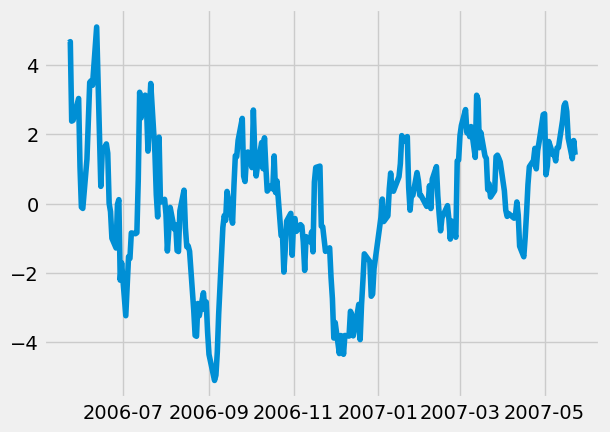

In [292]:
plt.plot(spread.iloc[trainset])

In [293]:
px.line(spread.iloc[trainset],template="plotly_dark",title='spread on gold and gdx', labels={"value":"spread in $"})

In [294]:
px.line(spread.iloc[testset],template="ggplot2")

In [295]:
spreadMean = np.mean(spread.iloc[trainset])
spreadMean

0.052196238500393316

In [296]:
spreadStd=np.std(spread.iloc[trainset])
spreadStd

1.9448608734965083

In [297]:
df['zscore'] = (spread-spreadMean)/spreadStd
df

,Open_GLD,High_GLD,Low_GLD,Close_GLD,Volume_GLD,Adj Close_GLD,Open_GDX,High_GDX,Low_GDX,Close_GDX,Volume_GDX,Adj Close_GDX,zscore
Date,,,,,,,,,,,,,
2006-05-23,65.99,67.16,65.91,66.38,10509700,66.38,37.75,39.22,37.75,37.96,620900,37.85,2.362182
2006-05-24,64.83,65.16,63.22,64.06,11065600,64.06,37.13,37.57,35.87,36.52,638600,36.41,2.376914
2006-05-25,64.12,64.76,63.76,64.70,6505400,64.70,37.18,38.32,36.98,38.32,367000,38.21,1.196462
2006-05-26,65.01,65.10,63.75,65.10,5265900,65.10,38.74,38.74,37.77,38.55,269400,38.44,1.209248
2006-05-30,65.20,66.24,65.00,65.11,8240200,65.11,39.50,39.72,38.11,38.17,559100,38.06,1.533068
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-11-26,82.25,82.25,81.13,81.30,7440200,81.30,49.43,49.43,46.85,47.06,1966500,47.06,2.309945
2007-11-27,80.70,80.89,79.81,80.10,7229900,80.10,46.84,46.84,45.74,46.61,2329700,46.61,2.070316
2007-11-28,79.42,79.87,78.76,79.57,9706700,79.57,46.11,48.00,46.06,47.86,3893200,47.86,0.749522


In [298]:
df['positions_GLD_Long'] = 0
df['positions_GDX_Long'] = 0
df['positions_GLD_Short'] = 0
df['positions_GDX_Short'] = 0 

In [299]:
df.loc[df.zscore>=2,('positions_GLD_Short','positions_GDX_Short')]=[-1,1] #short spread
df 

,Open_GLD,High_GLD,Low_GLD,Close_GLD,Volume_GLD,Adj Close_GLD,Open_GDX,High_GDX,Low_GDX,Close_GDX,Volume_GDX,Adj Close_GDX,zscore,positions_GLD_Long,positions_GDX_Long,positions_GLD_Short,positions_GDX_Short
Date,,,,,,,,,,,,,,,,,
2006-05-23,65.99,67.16,65.91,66.38,10509700,66.38,37.75,39.22,37.75,37.96,620900,37.85,2.362182,0,0,-1,1
2006-05-24,64.83,65.16,63.22,64.06,11065600,64.06,37.13,37.57,35.87,36.52,638600,36.41,2.376914,0,0,-1,1
2006-05-25,64.12,64.76,63.76,64.70,6505400,64.70,37.18,38.32,36.98,38.32,367000,38.21,1.196462,0,0,0,0
2006-05-26,65.01,65.10,63.75,65.10,5265900,65.10,38.74,38.74,37.77,38.55,269400,38.44,1.209248,0,0,0,0
2006-05-30,65.20,66.24,65.00,65.11,8240200,65.11,39.50,39.72,38.11,38.17,559100,38.06,1.533068,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-11-26,82.25,82.25,81.13,81.30,7440200,81.30,49.43,49.43,46.85,47.06,1966500,47.06,2.309945,0,0,-1,1
2007-11-27,80.70,80.89,79.81,80.10,7229900,80.10,46.84,46.84,45.74,46.61,2329700,46.61,2.070316,0,0,-1,1
2007-11-28,79.42,79.87,78.76,79.57,9706700,79.57,46.11,48.00,46.06,47.86,3893200,47.86,0.749522,0,0,0,0


In [300]:
df.loc[df.zscore<=-2,('positions_GLD_Long','positions_GDX_Long')] = [1,-1] #BUY SPREAD

In [301]:
df.loc[df.zscore<=1,('positions_GLD_Short','positions_GDX_Short')] = 0 #exit short spread

In [302]:
df.loc[df.zscore<=-1,('positions_GLD_Long','positions_GDX_Long')] = 0 #exit long spread

In [303]:
df.fillna(method='ffill',inplace=True) #ensure existing positions are carried forward unless theres an exit signal

In [304]:
positions_Long=df.loc[:,('positions_GLD_Long','positions_GDX_Long')]
positions_Long

,positions_GLD_Long,positions_GDX_Long
Date,,
2006-05-23,0,0
2006-05-24,0,0
2006-05-25,0,0
2006-05-26,0,0
2006-05-30,0,0
...,...,...
2007-11-26,0,0
2007-11-27,0,0
2007-11-28,0,0


In [305]:
positions_Short= df.loc[:,('positions_GLD_Short', 'positions_GDX_Short')]
positions_Short

,positions_GLD_Short,positions_GDX_Short
Date,,
2006-05-23,-1,1
2006-05-24,-1,1
2006-05-25,0,0
2006-05-26,0,0
2006-05-30,0,0
...,...,...
2007-11-26,-1,1
2007-11-27,-1,1
2007-11-28,0,0


In [306]:
positions = np.array(positions_Long) + np.array(positions_Short)
positions 

array([[-1,  1],
       [-1,  1],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [-1,  1],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0

In [307]:
positions = pd.DataFrame(positions)
positions

,0,1
0,-1,1
1,-1,1
2,0,0
3,0,0
4,0,0
...,...,...
380,-1,1
381,-1,1
382,0,0
383,0,0


In [308]:
dailyr = df.loc[:,('Adj Close_GLD','Adj Close_GDX')].pct_change() 
dailyr

,Adj Close_GLD,Adj Close_GDX
Date,,
2006-05-23,NaN,NaN
2006-05-24,-0.034950,-0.038045
2006-05-25,0.009991,0.049437
2006-05-26,0.006182,0.006019
2006-05-30,0.000154,-0.009886
...,...,...
2007-11-26,0.000615,-0.036643
2007-11-27,-0.014760,-0.009562
2007-11-28,-0.006617,0.026818


In [309]:
pnl = (np.array(positions.shift())*np.array(dailyr)).sum(axis=1)
pnl

array([        nan, -0.00309463,  0.03944633,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.02185057,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [310]:
sharpeTrainset=np.sqrt(252)*np.mean(pnl[trainset[1:]])/np.std(pnl[trainset[1:]])

In [311]:
sharpeTrainset

1.2945070247309065

In [312]:
sharpeTestset = np.sqrt(252)*np.mean(pnl[testset])/np.std(pnl[testset])

In [313]:
sharpeTestset

1.166427239360731

In [314]:
px.line(np.cumsum(pnl[testset]))

In [315]:
#list = np.array([x**2 for x in range (1,23)])
#list

In [316]:
#list.cumsum()

In [317]:
#list.cumprod()

A Simple Mean-Reverting Model with and
without Transaction Costs

Here is a simple mean-reverting model that is attributable to Amir Khandani
and Andrew Lo at MIT (available at web.mit.edu/alo/www/Papers/august07.
pdf). This strategy is very simple: Buy the stocks with the worst previous
one-day returns, and short the ones with the best previous one-day returns.

In [318]:
startdate = '2006-01-01'
enddate = '2006-12-31'

In [319]:
spdf = pd.read_table('misc files/SPX_20071123.txt')
spdf

,Date,A,AA,AAPL,ABC,ABI,ABK,ABT,ACAS,ACE,...,XEL,XL,XLNX,XOM,XRX,XTO,YHOO,YUM,ZION,ZMH
0,19991124.0,41.1250,20.3772,23.6563,5.9980,NaN,31.1549,22.8971,7.6786,12.8492,...,14.8614,38.5249,43.8110,35.1539,26.7738,2.2456,57.7500,10.0716,51.6312,NaN
1,19991126.0,41.1875,20.6142,23.7656,5.9980,NaN,31.1183,22.5998,7.6320,12.8492,...,14.9079,38.5249,43.5356,34.6541,26.7738,2.2215,56.7188,9.8871,51.6826,NaN
2,19991129.0,42.0000,20.5352,23.6406,5.9675,NaN,30.6418,23.0086,7.5855,12.2246,...,14.8614,38.2478,46.8092,35.2650,26.2989,2.0403,56.5313,9.9640,50.7074,NaN
3,19991130.0,42.1875,20.6932,24.4688,6.0284,NaN,31.9613,22.5998,7.4925,12.1353,...,15.0926,37.6935,43.8110,35.2372,25.7052,1.9679,53.1875,10.2100,53.0170,NaN
4,19991201.0,43.0000,21.1078,25.7656,6.0588,NaN,33.5740,22.2652,7.5390,12.2692,...,15.0460,37.7859,43.7804,36.3201,25.3584,1.9317,57.2188,10.0101,53.6329,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,20071116.0,36.7200,36.3100,166.3900,44.9800,34.12,27.4600,55.2100,38.9200,58.1600,...,22.1500,63.2000,22.9700,85.1000,15.8200,63.5800,26.8200,38.0700,51.9500,65.38
2020,20071119.0,35.8000,35.0700,163.9500,43.6900,33.17,25.5300,54.8200,37.5500,57.6300,...,22.1300,58.8700,22.6900,84.1100,16.0800,62.5600,26.7600,37.8000,50.2200,65.79
2021,20071120.0,36.5100,35.3800,168.8500,44.3200,33.54,24.7900,55.5800,37.5900,57.3500,...,22.1400,55.6600,21.9500,87.8200,16.2300,63.5500,26.7200,37.8700,50.0400,64.24
2022,20071121.0,36.7000,35.1700,168.4600,43.5200,33.15,24.1400,54.7300,37.0900,57.9500,...,22.1000,51.0300,21.5900,87.0200,16.0900,62.2200,25.7100,37.2100,50.2500,63.48


In [320]:
spdf['Date']=spdf['Date'].astype('int')
spdf.set_index('Date', inplace=True)
spdf.sort_index(inplace=True)
spdf

,A,AA,AAPL,ABC,ABI,ABK,ABT,ACAS,ACE,ACS,...,XEL,XL,XLNX,XOM,XRX,XTO,YHOO,YUM,ZION,ZMH
Date,,,,,,,,,,,,,,,,,,,,,
19991124,41.1250,20.3772,23.6563,5.9980,NaN,31.1549,22.8971,7.6786,12.8492,19.0000,...,14.8614,38.5249,43.8110,35.1539,26.7738,2.2456,57.7500,10.0716,51.6312,NaN
19991126,41.1875,20.6142,23.7656,5.9980,NaN,31.1183,22.5998,7.6320,12.8492,18.7188,...,14.9079,38.5249,43.5356,34.6541,26.7738,2.2215,56.7188,9.8871,51.6826,NaN
19991129,42.0000,20.5352,23.6406,5.9675,NaN,30.6418,23.0086,7.5855,12.2246,18.7188,...,14.8614,38.2478,46.8092,35.2650,26.2989,2.0403,56.5313,9.9640,50.7074,NaN
19991130,42.1875,20.6932,24.4688,6.0284,NaN,31.9613,22.5998,7.4925,12.1353,18.7188,...,15.0926,37.6935,43.8110,35.2372,25.7052,1.9679,53.1875,10.2100,53.0170,NaN
19991201,43.0000,21.1078,25.7656,6.0588,NaN,33.5740,22.2652,7.5390,12.2692,18.7188,...,15.0460,37.7859,43.7804,36.3201,25.3584,1.9317,57.2188,10.0101,53.6329,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20071116,36.7200,36.3100,166.3900,44.9800,34.12,27.4600,55.2100,38.9200,58.1600,41.7800,...,22.1500,63.2000,22.9700,85.1000,15.8200,63.5800,26.8200,38.0700,51.9500,65.38
20071119,35.8000,35.0700,163.9500,43.6900,33.17,25.5300,54.8200,37.5500,57.6300,40.8100,...,22.1300,58.8700,22.6900,84.1100,16.0800,62.5600,26.7600,37.8000,50.2200,65.79
20071120,36.5100,35.3800,168.8500,44.3200,33.54,24.7900,55.5800,37.5900,57.3500,40.7300,...,22.1400,55.6600,21.9500,87.8200,16.2300,63.5500,26.7200,37.8700,50.0400,64.24


spx = yf.download('SPX',startdate,enddate)
spx

In [321]:
stxdailyr = spdf.pct_change()
stxdailyr

,A,AA,AAPL,ABC,ABI,ABK,ABT,ACAS,ACE,ACS,...,XEL,XL,XLNX,XOM,XRX,XTO,YHOO,YUM,ZION,ZMH
Date,,,,,,,,,,,,,,,,,,,,,
19991124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19991126,0.001520,0.011631,0.004620,0.000000,NaN,-0.001175,-0.012984,-0.006069,0.000000,-0.014800,...,0.003129,0.000000,-0.006286,-0.014217,0.000000,-0.010732,-0.017856,-0.018319,0.000996,NaN
19991129,0.019727,-0.003832,-0.005260,-0.005085,NaN,-0.015313,0.018089,-0.006093,-0.048610,0.000000,...,-0.003119,-0.007193,0.075194,0.017629,-0.017737,-0.081567,-0.003306,0.007778,-0.018869,NaN
19991130,0.004464,0.007694,0.035033,0.010205,NaN,0.043062,-0.017767,-0.012260,-0.007305,0.000000,...,0.015557,-0.014492,-0.064052,-0.000788,-0.022575,-0.035485,-0.059150,0.024689,0.045548,NaN
19991201,0.019259,0.020036,0.052998,0.005043,NaN,0.050458,-0.014805,0.006206,0.011034,0.000000,...,-0.003088,0.002451,-0.000698,0.030732,-0.013491,-0.018395,0.075794,-0.019579,0.011617,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20071116,0.089614,-0.000551,0.012721,0.013748,-0.003796,-0.027620,0.013399,-0.027729,-0.011389,-0.002864,...,0.004535,-0.047476,-0.003038,0.007220,0.000000,0.025649,0.055075,0.007143,-0.002305,-0.011491
20071119,-0.025054,-0.034150,-0.014664,-0.028679,-0.027843,-0.070284,-0.007064,-0.035200,-0.009113,-0.023217,...,-0.000903,-0.068513,-0.012190,-0.011633,0.016435,-0.016043,-0.002237,-0.007092,-0.033301,0.006271
20071120,0.019832,0.008839,0.029887,0.014420,0.011155,-0.028986,0.013864,0.001065,-0.004859,-0.001960,...,0.000452,-0.054527,-0.032613,0.044109,0.009328,0.015825,-0.001495,0.001852,-0.003584,-0.023560


In [322]:
np.array(stxdailyr)

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.00151976,  0.01163065,  0.00462033, ..., -0.01831884,
         0.00099552,         nan],
       [ 0.01972686, -0.00383231, -0.0052597 , ...,  0.00777781,
        -0.01886902,         nan],
       ...,
       [ 0.0198324 ,  0.00883946,  0.02988716, ...,  0.00185185,
        -0.00358423, -0.02355981],
       [ 0.00520405, -0.00593556, -0.00230974, ..., -0.01742804,
         0.00419664, -0.01183064],
       [ 0.00572207, -0.00056867,  0.01828327, ...,  0.01182478,
         0.03482587,  0.0168557 ]])

In [323]:
marketDailyret = stxdailyr.mean(axis=1)
marketDailyret

Date
19991124         NaN
19991126   -0.001131
19991129   -0.010252
19991130   -0.000814
19991201    0.002520
              ...   
20071116    0.001130
20071119   -0.020675
20071120    0.000076
20071121   -0.014486
20071123    0.019083
Length: 2024, dtype: float64

In [324]:
np.array(marketDailyret).reshape((stxdailyr.shape[0],1))

array([[            nan],
       [-1.13122903e-03],
       [-1.02518172e-02],
       ...,
       [ 7.55332702e-05],
       [-1.44864234e-02],
       [ 1.90825658e-02]])

In [325]:
weights=-(np.array(stxdailyr)-np.array(marketDailyret).reshape((stxdailyr.shape[0],1)))
weights

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.00265099, -0.01276188, -0.00575156, ...,  0.01718761,
        -0.00212675,         nan],
       [-0.02997868, -0.00641951, -0.00499211, ..., -0.01802963,
         0.0086172 ,         nan],
       ...,
       [-0.01975687, -0.00876393, -0.02981163, ..., -0.00177632,
         0.00365976,  0.02363534],
       [-0.01969048, -0.00855087, -0.01217668, ...,  0.00294162,
        -0.01868307, -0.00265579],
       [ 0.01336049,  0.01965123,  0.00079929, ...,  0.00725779,
        -0.0157433 ,  0.00222686]])

In [326]:
wtsum = np.nansum(abs(weights),axis=1)
wtsum

array([0.        , 5.51772376, 8.62801143, ..., 8.1433497 , 6.33286844,
       5.77799263])

In [332]:
weights[wtsum==0,]=0
weights

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.70738013e-05, -4.19174234e-04, -1.88914787e-04, ...,
         5.64541059e-04, -6.98548817e-05,             nan],
       [-4.02708713e-04, -8.62343481e-05, -6.70599279e-05, ...,
        -2.42195104e-04,  1.15756364e-04,             nan],
       ...,
       [-2.97928431e-04, -1.32157788e-04, -4.49551566e-04, ...,
        -2.67864209e-05,  5.51882664e-05,  3.56414835e-04],
       [-4.90970397e-04, -2.13210800e-04, -3.03618338e-04, ...,
         7.33475514e-05, -4.65851200e-04, -6.62205102e-05],
       [ 4.00192165e-04,  5.88621096e-04,  2.39415626e-05, ...,
         2.17395367e-04, -4.71565406e-04,  6.67021110e-05]])

In [330]:
wtsum[wtsum==0]=1
wtsum

array([1.        , 5.51772376, 8.62801143, ..., 8.1433497 , 6.33286844,
       5.77799263])

In [331]:
weights=weights/wtsum.reshape((stxdailyr.shape[0],1))
weights

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.70738013e-05, -4.19174234e-04, -1.88914787e-04, ...,
         5.64541059e-04, -6.98548817e-05,             nan],
       [-4.02708713e-04, -8.62343481e-05, -6.70599279e-05, ...,
        -2.42195104e-04,  1.15756364e-04,             nan],
       ...,
       [-2.97928431e-04, -1.32157788e-04, -4.49551566e-04, ...,
        -2.67864209e-05,  5.51882664e-05,  3.56414835e-04],
       [-4.90970397e-04, -2.13210800e-04, -3.03618338e-04, ...,
         7.33475514e-05, -4.65851200e-04, -6.62205102e-05],
       [ 4.00192165e-04,  5.88621096e-04,  2.39415626e-05, ...,
         2.17395367e-04, -4.71565406e-04,  6.67021110e-05]])

In [334]:
dailypnl = np.nansum(np.array(pd.DataFrame(weights).shift())*np.array(stxdailyr),axis=1)
dailypnl

array([ 0.00000000e+00,  0.00000000e+00,  7.36274170e-05, ...,
       -1.60742502e-03,  5.38931132e-05, -5.73084651e-06])

In [336]:
#had to change dates back to int to use 
startDate,endDate =20060101,20061231
dailypnl=dailypnl[np.logical_and(spdf.index >= startDate, spdf.index<=endDate)]
dailypnl


array([-1.83608307e-03, -2.07245115e-04,  3.79333732e-04,  6.06132934e-04,
        8.20541685e-05,  3.86493633e-05, -3.47429362e-04, -1.98777698e-04,
        3.11735349e-04, -7.21654074e-04,  3.86366333e-04, -4.48817162e-04,
        7.46309441e-05,  1.50377454e-04, -2.41685163e-04, -4.54158481e-04,
       -9.21293725e-05,  1.70126484e-04,  1.97479000e-04,  7.90121272e-05,
        5.96179071e-04, -8.01152199e-05,  1.41679945e-04, -1.73809243e-04,
        2.04611109e-03, -5.18684078e-04,  2.90873336e-04, -8.96348158e-06,
        2.80878488e-04,  9.20665409e-04, -7.93821150e-04,  7.79962536e-04,
       -3.24187649e-04, -1.12472176e-03,  1.72984230e-03,  9.80332736e-05,
       -4.16645075e-05,  4.98978922e-04,  2.63751486e-04, -1.85530330e-04,
       -5.89408598e-04, -6.58677452e-04,  5.13165111e-05, -4.14422845e-04,
       -1.71784873e-04,  6.43431434e-05, -4.44192989e-04,  1.04592161e-03,
       -3.65655186e-04,  1.52591440e-04,  2.50839436e-04,  2.73078727e-04,
       -5.15816682e-04,  

spdf.index

mask = (spdf['Date'] >= startdate) & (spdf['Date']<=enddate)
spdf2 = spdf.loc[mask]

In [346]:
sharpeRatioMR= np.sqrt(252)*np.mean(dailypnl)/np.std(dailypnl)
sharpeRatioMR

0.6413225793066807



With Transaction constant

In [348]:
onewaytcost = 0.0005, #5 basis points, .05%


In [353]:
endDate,startDate

(20061231, 20060101)

In [356]:
weights = weights[np.logical_and(spdf.index>= startDate,spdf.index<=endDate)]
weights

array([[ 1.85828694e-04,  8.78841783e-05, -4.89951359e-04, ...,
         3.69198516e-04,  6.73888454e-05,  1.85969161e-06],
       [ 1.51343575e-04,  3.89532598e-05,  1.41735749e-04, ...,
        -6.84083685e-05, -2.22306008e-05, -1.14423923e-04],
       [-8.42014897e-04, -2.50766993e-04,  2.63583692e-04, ...,
        -1.37527270e-03, -2.78273189e-04,  3.60168273e-04],
       ...,
       [-8.72516292e-04, -1.71641147e-03,  7.56247406e-04, ...,
        -9.03764818e-05, -5.05501896e-04,  6.12697780e-04],
       [-4.72084985e-03, -5.13946477e-04,  1.24964204e-03, ...,
        -1.40810349e-04, -5.67391721e-04,  1.20128986e-03],
       [ 1.54438770e-03, -7.24930543e-04, -8.68623989e-03, ...,
         1.20243232e-05,  5.71043978e-05, -1.45986635e-03]])

In [357]:
dailypnlminustcost = dailypnl - (np.nansum(abs(weights-np.array(pd.DataFrame(weights).shift())), axis=1)*onewaytcost)
dailypnlminustcost

array([-1.83608307e-03, -3.23114799e-04,  2.42524649e-04,  4.62413883e-04,
       -6.41994971e-05, -1.01377571e-04, -4.86481609e-04, -3.50728982e-04,
        1.48345476e-04, -8.61822994e-04,  1.98352179e-04, -6.21987963e-04,
       -4.78254689e-05,  3.69107890e-06, -3.80106791e-04, -5.66633077e-04,
       -2.04796274e-04,  5.77164416e-05,  7.26254424e-05, -5.69442946e-05,
        4.52253388e-04, -2.20976087e-04, -7.61509197e-06, -3.21439714e-04,
        1.90132866e-03, -6.45090566e-04,  1.45062513e-04, -1.59977227e-04,
        9.65525601e-05,  7.46189811e-04, -9.27944646e-04,  6.23618033e-04,
       -4.66084677e-04, -1.25916307e-03,  1.57723336e-03, -6.61143648e-05,
       -2.23833121e-04,  3.26828792e-04,  1.05842481e-04, -3.40657260e-04,
       -7.25456710e-04, -8.25770022e-04, -1.19026756e-04, -5.35340553e-04,
       -3.20323427e-04, -1.01247788e-04, -6.11382965e-04,  8.54366105e-04,
       -5.19127793e-04,  3.06185423e-06,  1.00088205e-04,  1.06955609e-04,
       -6.70723495e-04, -

In [358]:
sharpeRatioMinusTcost = np.sqrt(252)*np.mean(dailypnlminustcost)/np.std(dailypnlminustcost)
sharpeRatioMinusTcost

-3.3950726055727447